In [97]:
from sklearn.metrics import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import *
import seaborn as sns
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import *
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from sklearn.decomposition import *
from keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
import optuna
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.metrics import AUC, Precision, Recall

In [98]:
df = pd.read_csv(r'C:\Users\shaur\Desktop\ML\Projects\FEC 5\credit_risk_dataset.csv')

In [99]:
df['cb_person_default_on_file']= df['cb_person_default_on_file'].replace({'Y':1,'N':0})


C:\Users\shaur\AppData\Local\Temp\ipykernel_7520\1933310368.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cb_person_default_on_file']= df['cb_person_default_on_file'].replace({'Y':1,'N':0})


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [101]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [102]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26


In [103]:
df.drop('loan_percent_income',axis=1,inplace=True)

In [104]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,1,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0,26


In [107]:
y=(df['loan_status'])

In [108]:
print("Class balance/imbalance?")
print("  0                 1")
print(100*np.unique(y,return_counts=True)[1]/np.unique(y,return_counts=True)[1].sum())
print(np.unique(y,return_counts=True)[1])

Class balance/imbalance?
  0                 1
[78.13116979 21.86883021]
[25327  7089]


In [109]:
X=pd.concat([df.iloc[:,:8],df.iloc[:,9:]],axis=1)


In [110]:
X = X.loc[X['person_age']<100,:]

In [111]:
X = X.loc[(X['person_emp_length']<85) | (X['person_emp_length'].isna()), :]

In [112]:
y = y[X.index]

In [113]:
X.shape,y.shape

((32409, 10), (32409,))

In [114]:
print(X['loan_intent'].value_counts())
print("\n")
print(X['person_home_ownership'].value_counts())
print("\n")
print(X['loan_grade'].value_counts())
print("\n")
print(X['cb_person_default_on_file'].value_counts())

loan_intent
EDUCATION            6409
MEDICAL              6042
VENTURE              5679
PERSONAL             5496
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64


person_home_ownership
RENT        16374
MORTGAGE    13366
OWN          2563
OTHER         106
Name: count, dtype: int64


loan_grade
A    10702
B    10384
C     6436
D     3619
E      963
F      241
G       64
Name: count, dtype: int64


cb_person_default_on_file
0    26680
1     5729
Name: count, dtype: int64


In [115]:
X.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
count,32409.000000,3.240900e+04,31522.000000,32409.000000,29315.000000,32409.000000,32409.000000
mean,27.730754,6.589428e+04,4.782850,9592.486655,11.017099,0.176772,5.811194
std,6.210445,5.251787e+04,4.037343,6320.885127,3.241718,0.381481,4.057899
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.470000,0.000000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,30.000000


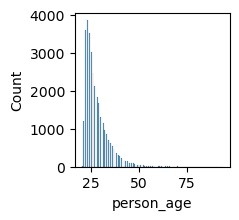

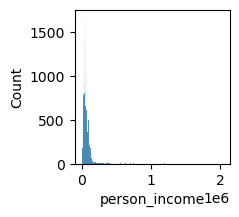

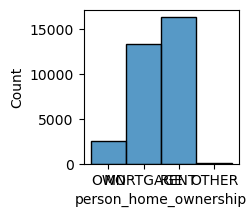

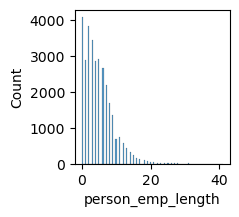

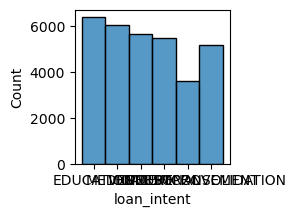

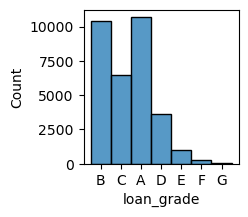

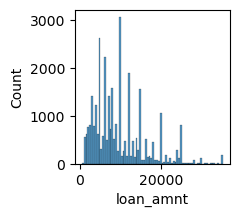

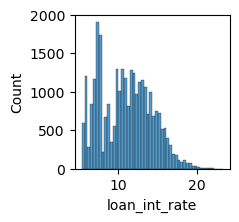

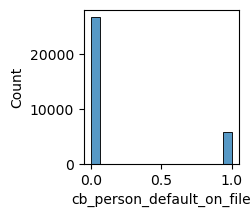

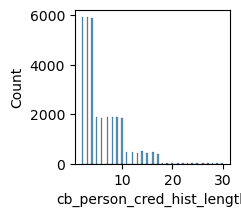

In [116]:
for col in X.columns:
    plt.figure(figsize=(2,2))
    sns.histplot(X[col])
    plt.show()

In [117]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [118]:
np.unique(y_test,return_counts=True),np.unique(y_train,return_counts=True)

((array([0, 1], dtype=int64), array([6339, 1764], dtype=int64)),
 (array([0, 1], dtype=int64), array([18982,  5324], dtype=int64)))

In [119]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24306, 10), (8103, 10), (24306,), (8103,))

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numeric_columns = ['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate',
                   'cb_person_cred_hist_length']
nominal_columns = ['person_home_ownership','loan_intent','cb_person_default_on_file',]
ordinal_columns = ['loan_grade']
num_transformer = Pipeline(steps = 
                               [('imp',SimpleImputer(strategy="mean")),
                                ('ss',StandardScaler())
                               ])
cat_ord_transformer = Pipeline(steps = [('oe',OrdinalEncoder(categories=[['G','F','E','D','C','B','A']]))])
cat_nom_transformer = Pipeline(steps = [('ohe',OneHotEncoder(sparse_output=False,drop='first'))])                         

transformer = ColumnTransformer(
    transformers=[('num',num_transformer,numeric_columns),
                  ('cat_o',cat_ord_transformer,ordinal_columns),
                  ('cat_n',cat_nom_transformer,nominal_columns)
                  ],
    remainder='passthrough')

In [121]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [122]:
X_train.shape,X_test.shape,transformer.get_feature_names_out()

((24306, 16),
 (8103, 16),
 array(['num__person_age', 'num__person_income', 'num__person_emp_length',
        'num__loan_amnt', 'num__loan_int_rate',
        'num__cb_person_cred_hist_length', 'cat_o__loan_grade',
        'cat_n__person_home_ownership_OTHER',
        'cat_n__person_home_ownership_OWN',
        'cat_n__person_home_ownership_RENT',
        'cat_n__loan_intent_EDUCATION',
        'cat_n__loan_intent_HOMEIMPROVEMENT', 'cat_n__loan_intent_MEDICAL',
        'cat_n__loan_intent_PERSONAL', 'cat_n__loan_intent_VENTURE',
        'cat_n__cb_person_default_on_file_1'], dtype=object))

In [123]:
view = pd.DataFrame(X_train)
view['y'] = y_train
view

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y
0,-1.088435,-0.921480,-1.197397,-1.042239,-1.016924,-0.942190,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.367048,0.239442,-0.946486,2.601056,1.599934,-0.199242,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,-0.603274,-1.077043,-0.193756,-1.327367,-1.214974,-0.446891,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.279834,-0.012091,-1.197397,-0.883835,-1.822111,-0.942190,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-0.118113,-0.186229,-0.193756,0.074510,-0.455241,0.543705,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24301,1.660810,-0.592552,0.057154,-0.725431,1.408377,2.029600,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
24302,-0.603274,-0.399065,0.809885,-0.725431,-1.701983,-0.694540,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
24303,-1.088435,-0.824736,0.308065,-1.042239,0.752539,-0.694540,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
24304,-0.603274,0.262661,-0.444666,1.017014,0.531762,-0.942190,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [124]:
metrics = ['AUC','F1','Recall','Precision','Accuracy']
columns = ['model_name'] + metrics
results = pd.DataFrame(columns=columns)

In [125]:
def predictor(model,name,inp=X_test,out=y_test,fitpar=None):
    print("TRAIN-TEST RESULTS")
    if not isinstance(model,Sequential):
        model.fit(X_train ,y_train)
        y_pred = model.predict(inp)
        y_train_pred = model.predict(X_train)
        print("Training accuracy: ", accuracy_score(y_train,y_train_pred))
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(inp)[:, 1]
        else:
            y_prob = model.decision_function(inp)
        auc = roc_auc_score(out, y_prob)
    else:
        model.fit(X_train ,y_train,**fitpar)
        y_prob= model.predict(X_test)
        y_pred = (y_prob>0.5).astype(dtype="int")  
        auc = roc_auc_score(out, y_prob)
    print("Accuracy: ",accuracy_score(out,y_pred))
    tn,fp,fn,tp = (confusion_matrix(out,y_pred)).ravel()
    print("     0       1")
    print("0   ", tn, "  ", fp)
    print("1   ", fn, "  ", tp) 

    RocCurveDisplay.from_predictions(out, y_prob)
    plt.title("ROC Curve (X_test Evaluation)")
    plt.gcf().set_size_inches(3, 3)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    if not isinstance(model,Sequential):
        cv_metrics(model_object=model,name=name)
    else:
        model_scores = {'AUC':auc,
                    'F1':f1_score(out,y_pred),
                    'Recall':recall_score(out,y_pred),
                    'Precision':precision_score(out,y_pred),
                    'Accuracy':accuracy_score(out,y_pred)}
        update_and_print(model_name=name,model_scores=model_scores)
   
        
def cv_metrics(model_object,name,inp=X,out=y):
    final_pipeline = Pipeline(steps = 
                                [('preprocessor',transformer),
                                 ('model',model_object)
                                ])
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    #print("\nStratified Cross Val mean accuracy: ", np.mean(cross_val_score(final_pipeline,inp,out,cv=skf,scoring='accuracy',n_jobs=-1)))
    scores = cross_validate(final_pipeline, inp, out, cv=skf, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], n_jobs=-1)
    print("\nCROSS VAL RESULTS:")
    
    model_scores = {'AUC':scores['test_roc_auc'].mean(),
                    'F1':scores['test_f1'].mean(),
                    'Recall':scores['test_recall'].mean(),
                    'Precision':scores['test_precision'].mean(),
                    'Accuracy':scores['test_accuracy'].mean()}
    update_and_print(model_name=name,model_scores=model_scores)

def update_and_print(model_name,model_scores):
    for metric in model_scores:
        print(f"{metric} : {model_scores[metric]:.6f}")
        if model_name in results['model_name'].values:
            results.loc[results['model_name'] == model_name, metric] = model_scores[metric]
        else:
        # Create a new row with all attributes as NaN
            new_row = dict.fromkeys(results.columns, None)
            new_row['model_name'] = model_name
            new_row[metric] = model_scores[metric]
            results.loc[len(results)] = new_row


TRAIN-TEST RESULTS
Training accuracy:  0.775775528676047
Accuracy:  0.7769961742564482
     0       1
0    5321    1018
1    789    975


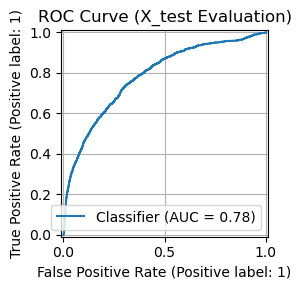


CROSS VAL RESULTS:
AUC : 0.785139
F1 : 0.518738
Recall : 0.555170
Precision : 0.487116
Accuracy : 0.774939


In [126]:
nb = GaussianNB()
predictor(nb,name="Gaussian Naive Bayes")

TRAIN-TEST RESULTS
Training accuracy:  0.84653994898379
Accuracy:  0.8401826484018264
     0       1
0    5945    394
1    901    863


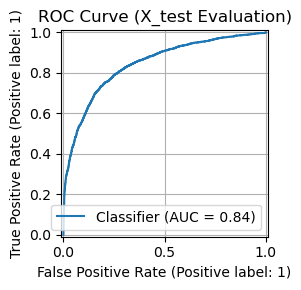


CROSS VAL RESULTS:
AUC : 0.845155
F1 : 0.583088
Recall : 0.498733
Precision : 0.702002
Accuracy : 0.844056


In [127]:
lr = LogisticRegression(penalty='l2',C=0.07,class_weight={0:5,1:6})
predictor(lr,name="Logistic Regression")

TRAIN-TEST RESULTS
Training accuracy:  0.9445815847938781
Accuracy:  0.9289152165864495
     0       1
0    6258    81
1    495    1269


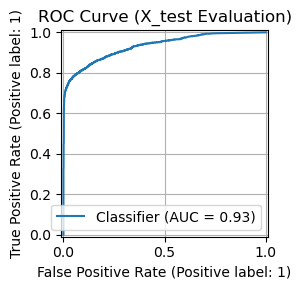


CROSS VAL RESULTS:
AUC : 0.935619
F1 : 0.811749
Recall : 0.707958
Precision : 0.951548
Accuracy : 0.928230


In [128]:
weak_learner = DecisionTreeClassifier(max_depth=10)
adbc = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, learning_rate=0.1, random_state=42)
predictor(adbc,name="Adaboost")

TRAIN-TEST RESULTS
Training accuracy:  0.8765736855097507
Accuracy:  0.8670862643465383
     0       1
0    6176    163
1    914    850


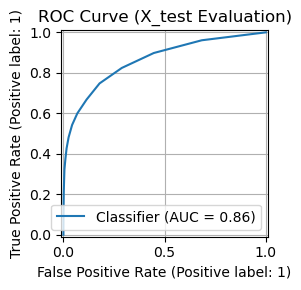


CROSS VAL RESULTS:
AUC : 0.860257
F1 : 0.612155
Recall : 0.481377
Precision : 0.841452
Accuracy : 0.866735


In [129]:
knn = KNeighborsClassifier(n_neighbors=15)
predictor(knn, name="KNN")

TRAIN-TEST RESULTS
Training accuracy:  0.876738253929071
Accuracy:  0.8702949524867333
     0       1
0    5979    360
1    691    1073


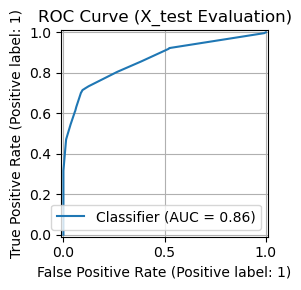


CROSS VAL RESULTS:
AUC : 0.871867
F1 : 0.633126
Recall : 0.493087
Precision : 0.884945
Accuracy : 0.875066


In [130]:
dt = DecisionTreeClassifier(max_depth=5)
predictor(dt,name="Decision Tree")

TRAIN-TEST RESULTS
Training accuracy:  0.9170575166625524
Accuracy:  0.9126249537208442
     0       1
0    6220    119
1    589    1175


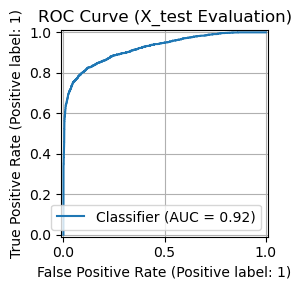


CROSS VAL RESULTS:
AUC : 0.919479
F1 : 0.775234
Recall : 0.669867
Precision : 0.920510
Accuracy : 0.915116


In [131]:
gb = GradientBoostingClassifier()
predictor(gb,name="Gradient Boosting")

TRAIN-TEST RESULTS
Training accuracy:  0.8892454537974163
Accuracy:  0.8857213377761323
     0       1
0    6234    105
1    821    943


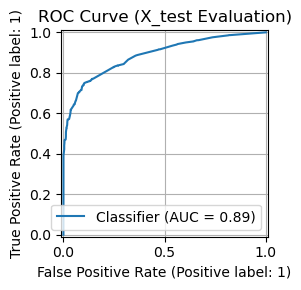


CROSS VAL RESULTS:
AUC : 0.885996
F1 : 0.668487
Recall : 0.538376
Precision : 0.883459
Accuracy : 0.883428


In [132]:
base_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=8,        # number of trees in the ensemble
    max_samples=0.7,        # each tree trains on 80% of the data
    max_features=1.0,       # each tree uses all features
    bootstrap=True,         # sampling with replacement
    random_state=42,
    n_jobs=-1               # parallel training
)
predictor(bagging_clf,name="Bagging")

TRAIN-TEST RESULTS


C:\Users\shaur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\shaur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training accuracy:  0.9451164321566692
Accuracy:  0.9359496482784154
     0       1
0    6267    72
1    447    1317


C:\Users\shaur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


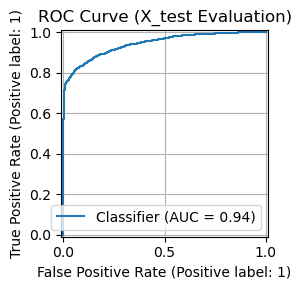


CROSS VAL RESULTS:
AUC : 0.944511
F1 : 0.827293
Recall : 0.729824
Precision : 0.955121
Accuracy : 0.933414


In [133]:
clf1 = XGBClassifier()
clf2 = LGBMClassifier()
clf3 = AdaBoostClassifier()  

voting_clf_soft = VotingClassifier(estimators=[
    ('xgb', clf1), ('lgbm', clf2), ('rf', clf3)],
    voting='soft')
predictor(voting_clf_soft,name="Voting")

TRAIN-TEST RESULTS
Training accuracy:  0.9501357689459393
Accuracy:  0.9280513390102432
     0       1
0    6255    84
1    499    1265


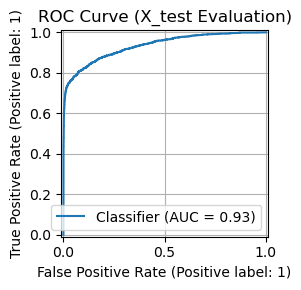


CROSS VAL RESULTS:
AUC : 0.931488
F1 : 0.810451
Recall : 0.708663
Precision : 0.946607
Accuracy : 0.927551


In [134]:
rf = RandomForestClassifier(n_estimators=45,min_samples_split=10,max_depth=19,criterion='entropy')
predictor(rf,name="Random Forest")

TRAIN-TEST RESULTS
Training accuracy:  0.9555665267835103
Accuracy:  0.9332346044674812
     0       1
0    6239    100
1    441    1323


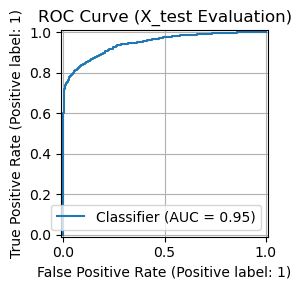


CROSS VAL RESULTS:
AUC : 0.947288
F1 : 0.826894
Recall : 0.737866
Precision : 0.940596
Accuracy : 0.932488


In [135]:
xgbc = XGBClassifier(eval_metric='mlogloss')
predictor(xgbc,name="XGBoost")

TRAIN-TEST RESULTS


C:\Users\shaur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\shaur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\shaur\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training accuracy:  0.9389862585369868
Accuracy:  0.9342218931260027
     0       1
0    6272    67
1    466    1298


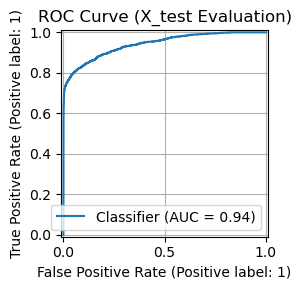


CROSS VAL RESULTS:
AUC : 0.944808
F1 : 0.822694
Recall : 0.723475
Precision : 0.953627
Accuracy : 0.931840


In [136]:
lgbc = LGBMClassifier(verbose=-1)
predictor(lgbc,name="Lightboost")

TRAIN-TEST RESULTS
Training accuracy:  0.9249156586850983
Accuracy:  0.9233617178822658
     0       1
0    6238    101
1    520    1244


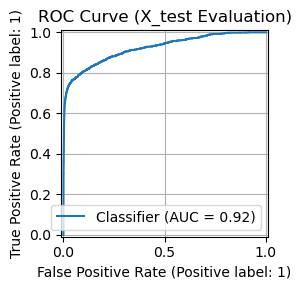


CROSS VAL RESULTS:
AUC : 0.922684
F1 : 0.799010
Recall : 0.696812
Precision : 0.936673
Accuracy : 0.923386


In [137]:
ctbc = CatBoostClassifier(iterations=100,learning_rate=0.1,depth=6,verbose=0)
predictor(ctbc,name="CatBoost")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,093 (43.33 KB)

 Trainable params: 11,093 (43.33 KB)

 Non-trainable params: 0 (0.00 B)

None
TRAIN-TEST RESULTS
Epoch 1/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7779 - auc: 0.6590 - loss: 0.5064 - val_accuracy: 0.8433 - val_auc: 0.8476 - val_loss: 0.3798
Epoch 2/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - auc: 0.7972 - loss: 0.4328 - val_accuracy: 0.8637 - val_auc: 0.8703 - val_loss: 0.3466
Epoch 3/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8413 - auc: 0.8374 - loss: 0.3880 - val_accuracy: 0.8822 - val_auc: 0.8899 - val_loss: 0.3185
Epoch 4/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - auc: 0.8574 - loss: 0.3601 - val_accuracy: 0.8853 - val_auc: 0.8949 - val_loss: 0.3079
Epoch 5/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8631 - auc: 0.8644 - loss: 0.3516 - val_accuracy: 0.8873 - val_auc: 0.8992 - val_loss: 0.2985
Epoch 6/100
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - auc: 0.8650 - loss: 0.3467 - val_accuracy: 0.8912 - val_auc: 0.9027 - val_loss: 0.2885
Epoch 7/10

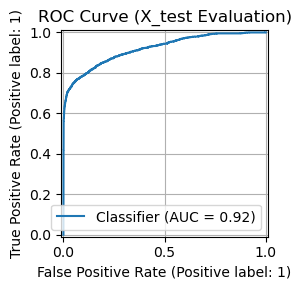

AUC : 0.919228
F1 : 0.788605
Recall : 0.690476
Precision : 0.919245
Accuracy : 0.919413


In [138]:
nn = Sequential()
nn.add(Input(shape=(16,)))
nn.add(Dense(128,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(64,activation='relu', ))
nn.add(Dropout(0.5))
nn.add(Dense(10,activation='relu', ))
nn.add(Dropout(0.3))
nn.add(Dense(1,activation='sigmoid'))
callback = EarlyStopping(monitor="val_accuracy",mode='max',min_delta=0.001,patience=10,verbose=1,baseline=None,restore_best_weights=True)
adam = Adam(learning_rate=0.003)
parameters ={
    'callbacks':callback,
    'epochs': 100,
    'batch_size': 32,
    'validation_split': 0.25,
    'verbose': 1
}
nn.compile(loss='binary_crossentropy',optimizer=adam,metrics=[AUC(name='auc'),"accuracy"])
print(nn.summary())
predictor(nn,fitpar=parameters,name="Neural Network")

In [139]:
results.sort_values(by='AUC',ascending=False)                    

,model_name,AUC,F1,Recall,Precision,Accuracy
9,XGBoost,0.947288,0.826894,0.737866,0.940596,0.932488
10,Lightboost,0.944808,0.822694,0.723475,0.953627,0.93184
7,Voting,0.944511,0.827293,0.729824,0.955121,0.933414
2,Adaboost,0.935619,0.811749,0.707958,0.951548,0.92823
8,Random Forest,0.931488,0.810451,0.708663,0.946607,0.927551
11,CatBoost,0.922684,0.79901,0.696812,0.936673,0.923386
5,Gradient Boosting,0.919479,0.775234,0.669867,0.92051,0.915116
12,Neural Network,0.919228,0.788605,0.690476,0.919245,0.919413
6,Bagging,0.885996,0.668487,0.538376,0.883459,0.883428
4,Decision Tree,0.871867,0.633126,0.493087,0.884945,0.875066


array(['Gaussian Naive Bayes', 'Logistic Regression', 'Adaboost', 'KNN',
       'Decision Tree', 'Gradient Boosting', 'Bagging', 'Voting',
       'Random Forest', 'XGBoost', 'Lightboost', 'CatBoost',
       'Neural Network'], dtype=object)